### Debanjan Chowdhury Data 690

### Assignment 07

**You can use the local Jupyter environment if you are not comfortable with Colab for this assignment.**

The first half of this assignment is a repeat of assignment 05.

This gives you a chance to refresh.

The second half is new and gives you a chance to perform additional practices.

You also get a chance to use some of the Python libraries and techniques.

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 5):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2019 school years.

if you are using your local environment, I suggest you create a new folder call "Assignment7" and place the Notebook file and the data folder under it.
```
Assignment7/
    - assignment_07.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'
```


In [80]:
# <1> 
# Import libraries

#(Write code here)
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# <2> 
# Display the current workin directory using os.getcwd()
# you would need to import a standard Python library called os which stands for operating system,
# so place that import statement in the previous cell.
# Since your notebook and your data files are not in # the same folder, 
# you want to make sure what is the current working folder and 
# how to access a data file in a different folder

#(Write code here)
os.getcwd()

'C:\\Users\\deban\\Assignment7'

In [361]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder.
# use this method to assign the contents (list of file names) of the data folder to a variable and display it.
# # You can use ../ construct to traverse to the parent folder and then to another foloder parallel to the current folder

#(Write code here)
dir = os.listdir("C:/Users/deban/Assignment7/CollegeScorecard_Raw_Data")
dir

['.DS_Store',
 'Crosswalks.zip',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [365]:
# <4> 
# The folder contains files that are not the yearly data files
# write code to remove the unwanted files from the list vsriable 
# Note: don't remove/delete these files from the folder in your drive
# For example, use the file extension to only keep the csv files 
# or use the name patter - data file name begins with "MERGED"
# You can use the concept of list comprehension to write just 
# one line of code as well as using a for loop, your choice.

#(Write code here)

for i in dir:
    if not (i.endswith(".csv") and i.startswith("MERGED")):
        dir.remove(i)

dir

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [366]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load six columns: 
# ["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"].
# You should use "usecols" option of Pandas to avoid reading unwanted columns.
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# The YEAR variable should be yyyy format so tht you can convert them into integer.
# if you use the format yyyy-yy (such as 1997-98 school year), you will not be able to convert them directly to integer
# if you use scatter plot, the YEAR needs to be converted to integer or float. 
# 
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

#(Write code here)
list = []
for i in dir:
    df = pd.read_csv('C:/Users/deban/Assignment7/CollegeScorecard_Raw_Data/' + i, usecols=["UNITID", "INSTNM", "STABBR", "REGION", "ADM_RATE", "TUITIONFEE_IN"])
    df["YEAR"] = ""
    df["YEAR"] = pd.to_datetime(df["YEAR"]) 
    df["YEAR"] = df["YEAR"].dt.strftime('/%Y')
    y = i[6:10]
    df["YEAR"] = int (y)
    list.append(df)
    
df_new = pd.concat(list)
df_new.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [367]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)

#number of observations - 163331 and 7 columns
df_new.shape

(163331, 7)

In [368]:
#columns of this dataframe

df_new.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'YEAR'],
      dtype='object')

In [408]:
#part of number 6 - information

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163331 entries, 0 to 6805
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   UNITID         163331 non-null  int64  
 1   INSTNM         163331 non-null  object 
 2   STABBR         163331 non-null  object 
 3   REGION         163330 non-null  float64
 4   ADM_RATE       44911 non-null   float64
 5   TUITIONFEE_IN  79194 non-null   float64
 6   YEAR           163331 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 10.0+ MB


In [370]:
#part of number 6 - head

df_new.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,AL,0.0,NaN,NaN,1996
1,100654,Alabama A & M University,AL,5.0,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,AL,5.0,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,AL,5.0,NaN,NaN,1996
4,100690,Amridge University,AL,5.0,NaN,NaN,1996


In [371]:
#part of number 6 - tail

df_new.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
6801,48511112,Georgia Military College - Dublin,GA,5.0,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,GA,5.0,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,KY,5.0,NaN,NaN,2018
6804,49005401,HCI College - Fort Lauderdale Campus,FL,5.0,NaN,21420.0,2018
6805,49146401,ABC Adult School - Cabrillo Lane,CA,8.0,NaN,NaN,2018


In [372]:
# part of 6 - number of missing values in each dataframe 
    
df_new.isnull().sum()

UNITID                0
INSTNM                0
STABBR                0
REGION                1
ADM_RATE         118420
TUITIONFEE_IN     84137
YEAR                  0
dtype: int64

In [373]:
# part of 6 - sample size statistics

df_new.sample(10)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
4758,410964,EINE Inc,MA,1.0,NaN,NaN,2015
1257,149772,Western Illinois University,IL,3.0,0.6771,8862.0,2008
6212,458034,Houston International College Cardiotech Ultra...,TX,6.0,NaN,10233.0,2015
5793,439783,New York College of Traditional Chinese Medicine,NY,2.0,NaN,NaN,2009
1488,156286,Bellarmine University,KY,5.0,0.5182,32140.0,2011
2778,189273,Beth Hamedrash Shaarei Yosher Institute,NY,2.0,1.0000,6010.0,2002
5285,391564,The Salter School-Tewksbury Campus,MA,1.0,0.4657,9800.0,2005
3172,196121,SUNY College at Brockport,NY,2.0,NaN,NaN,1999
3,100690,Amridge University,AL,5.0,NaN,6600.0,2008
2308,183202,Paul Mitchell the School-Portsmouth,NH,1.0,NaN,NaN,2012


In [374]:
# part of 6 - statistics of the dataframe

df_new.describe().round(2)

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
count,163331.00,163330.00,44911.00,79194.00,163331.00
mean,943239.46,4.55,0.69,11665.51,2007.25
std,4571721.48,2.19,0.22,9986.00,6.61
min,100636.00,0.00,0.00,0.00,1996.00
25%,163338.00,3.00,0.56,3776.00,2002.00
50%,212780.00,5.00,0.72,9285.00,2008.00
75%,407568.00,6.00,0.86,16146.00,2013.00
max,49146401.00,9.00,1.00,74787.00,2018.00


In [375]:
# <7>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at UMBC
# filter/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)
UMBC_df = df_new[df_new['INSTNM'].str.contains("University of Maryland-Baltimore County")]
UMBC_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


In [376]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)

#(Write code here)

#Part of number 8 columns of UMBC dataframe. UMBC dataframe has 23 rows and 7 columns
UMBC_df.shape 

(23, 7)

In [377]:
#Part of number 8 columns of UMBC dataframe

UMBC_df.columns

Index(['UNITID', 'INSTNM', 'STABBR', 'REGION', 'ADM_RATE', 'TUITIONFEE_IN',
       'YEAR'],
      dtype='object')

In [378]:
#Part of number 8 information about columns of UMBC dataframe

UMBC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 2151 to 1415
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UNITID         23 non-null     int64  
 1   INSTNM         23 non-null     object 
 2   STABBR         23 non-null     object 
 3   REGION         23 non-null     float64
 4   ADM_RATE       18 non-null     float64
 5   TUITIONFEE_IN  19 non-null     float64
 6   YEAR           23 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 1.4+ KB


In [379]:
#Part of Number 8 - head
UMBC_df.head()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000


In [380]:
#Part of Number 8 - tail
UMBC_df.tail()

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1555,163268,University of Maryland-Baltimore County,MD,2.0,0.5942,11006.0,2015
1510,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
1478,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018


In [381]:
# part of 6 - number of missing values in each dataframe  
UMBC_df.isnull().sum()

UNITID           0
INSTNM           0
STABBR           0
REGION           0
ADM_RATE         5
TUITIONFEE_IN    4
YEAR             0
dtype: int64

In [382]:
UMBC_df.sample(10)

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
1478,163268,University of Maryland-Baltimore County,MD,2.0,0.6021,11518.0,2017
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1510,163268,University of Maryland-Baltimore County,MD,2.0,0.5683,11264.0,2016
1745,163268,University of Maryland-Baltimore County,MD,2.0,0.6890,8872.0,2009
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
1415,163268,University of Maryland-Baltimore County,MD,2.0,0.5794,11778.0,2018
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1610,163268,University of Maryland-Baltimore County,MD,2.0,0.5961,10384.0,2014
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1779,163268,University of Maryland-Baltimore County,MD,2.0,0.6895,8708.0,2007


In [383]:
# part of 6 - statistics of the UMBC dataframe
UMBC_df.describe().round(2)

,UNITID,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
count,23.0,23.0,18.00,19.00,23.00
mean,163268.0,2.0,0.64,9004.84,2007.00
std,0.0,0.0,0.05,1825.80,6.78
min,163268.0,2.0,0.57,5490.00,1996.00
25%,163268.0,2.0,0.60,8270.00,2001.50
50%,163268.0,2.0,0.63,8872.00,2007.00
75%,163268.0,2.0,0.69,10226.00,2012.50
max,163268.0,2.0,0.72,11778.00,2018.00


In [384]:
UMBC_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005


Text(0, 0.5, 'In-State Tuition')

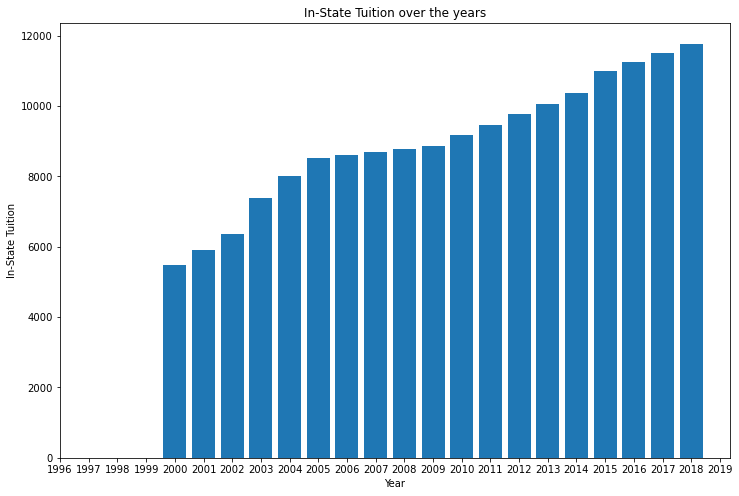

In [385]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Bar Chart

#(Write code here)
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(UMBC_df["YEAR"],UMBC_df["TUITIONFEE_IN"])
ax.set_xticks(range(1996, 2020, 1)) 
ax.set_title("In-State Tuition over the years")
ax.set_xlabel("Year")
ax.set_ylabel("In-State Tuition")


Text(0, 0.5, 'In-State Tuition')

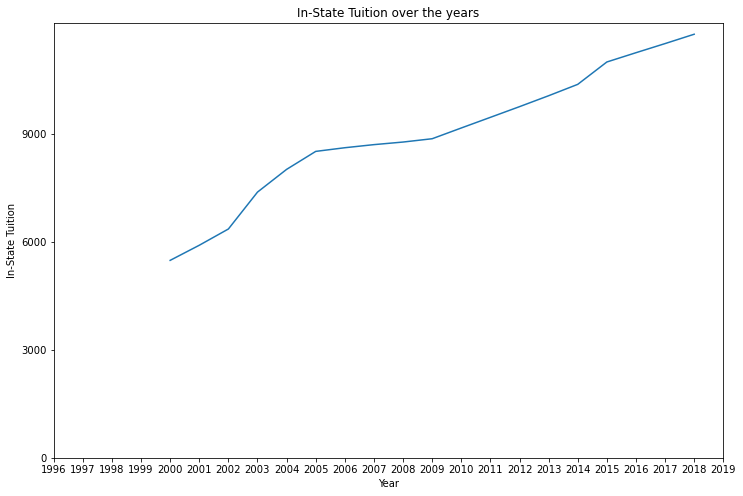

In [386]:
# <10> 
# Plot UMBC's in-state tution overtime from 1996 to 2019 using Line Chart

#(Write code here)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(UMBC_df["YEAR"],UMBC_df["TUITIONFEE_IN"])
ax.set_xticks(range(1996, 2020, 1))
ax.set_yticks(range(0, 12000, 3000)) 
ax.set_title("In-State Tuition over the years")
ax.set_xlabel("Year")
ax.set_ylabel("In-State Tuition")

In [387]:
# <11>
# Now let's look at the tuition growth rate year over year
# We need to calculate UMBC tuition change percentage each year
# First convert the TUITIONFEE_IN column to a Python List

#(Write code here)
in_tuitionfee_list = UMBC_df["TUITIONFEE_IN"].tolist()
in_tuitionfee_list

[nan,
 nan,
 nan,
 nan,
 5490.0,
 5910.0,
 6362.0,
 7388.0,
 8020.0,
 8520.0,
 8622.0,
 8708.0,
 8780.0,
 8872.0,
 9171.0,
 9467.0,
 9764.0,
 10068.0,
 10384.0,
 11006.0,
 11264.0,
 11518.0,
 11778.0]

In [388]:
# Loop through the list and calculate the % change each year over the prior year
# This takes some effort. Not hard, just some abstract/logical thinking and some experiments
# Have fun on this one

list_per_Change = []    
for i in range(len(in_tuitionfee_list)-1,  -1 , -1):
    per_Change = (((in_tuitionfee_list[i]-in_tuitionfee_list[i-1])/in_tuitionfee_list[i-1])*100)
    list_per_Change.append(per_Change)
list_per_Change

[2.2573363431151243,
 2.254971590909091,
 2.344175904052335,
 5.989984591679507,
 3.1386571315057608,
 3.11347808275297,
 3.1372134783986483,
 3.227565151019518,
 3.370153291253381,
 1.0478359908883828,
 0.8268259072117593,
 0.9974483878450475,
 1.1971830985915493,
 6.234413965087282,
 8.554412560909583,
 16.12700408676517,
 7.648054145516074,
 7.650273224043716,
 nan,
 nan,
 nan,
 nan,
 nan]

In [389]:
# The resulting number has many decimal points which are unnecessary and not visually appealing.
# Round up the percentage to two decimal points
# You can use for loop. Or better, use list comprehension for simplicity/brevity

#(Write code here)
percentage_change = []
for i in list_per_Change:
    f = "{:.2f}".format(i)
    percentage_change.append(f)
percentage_change.reverse()
percentage_change

['nan',
 'nan',
 'nan',
 'nan',
 'nan',
 '7.65',
 '7.65',
 '16.13',
 '8.55',
 '6.23',
 '1.20',
 '1.00',
 '0.83',
 '1.05',
 '3.37',
 '3.23',
 '3.14',
 '3.11',
 '3.14',
 '5.99',
 '2.34',
 '2.25',
 '2.26']

In [390]:
# Add the list of the percentages to the dataframe as a new column ("PCT_CHANGE")
# Not as hard as you may think. If you get stuck, you think too hard. 
# Google it and you will find the answer.

#(Write code here)
UMBC_df1 = UMBC_df.assign(PCT_CHANGE = percentage_change) 
UMBC_df1['PCT_CHANGE'] = UMBC_df1['PCT_CHANGE'].astype(float)
UMBC_df1

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2151,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1996,NaN
2049,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1997,NaN
1982,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1998,NaN
1955,163268,University of Maryland-Baltimore County,MD,2.0,NaN,NaN,1999,NaN
1926,163268,University of Maryland-Baltimore County,MD,2.0,NaN,5490.0,2000,NaN
1915,163268,University of Maryland-Baltimore County,MD,2.0,0.6551,5910.0,2001,7.65
1893,163268,University of Maryland-Baltimore County,MD,2.0,0.6327,6362.0,2002,7.65
1873,163268,University of Maryland-Baltimore County,MD,2.0,0.5757,7388.0,2003,16.13
1830,163268,University of Maryland-Baltimore County,MD,2.0,0.7014,8020.0,2004,8.55
1819,163268,University of Maryland-Baltimore County,MD,2.0,0.7143,8520.0,2005,6.23


Text(0, 0.5, 'In-State Tuition')

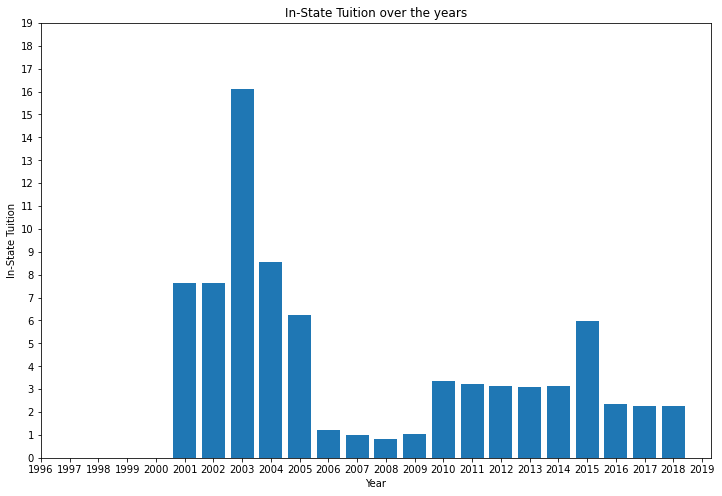

In [391]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

# (write code here)
# bar chart
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(UMBC_df1["YEAR"],UMBC_df1["PCT_CHANGE"])
ax.set_xticks(range(1996, 2020, 1))
ax.set_yticks(range(0, 20, 1)) 
ax.set_title("In-State Tuition over the years")
ax.set_xlabel("Year")
ax.set_ylabel("In-State Tuition")


Text(0, 0.5, 'In-State Tuition')

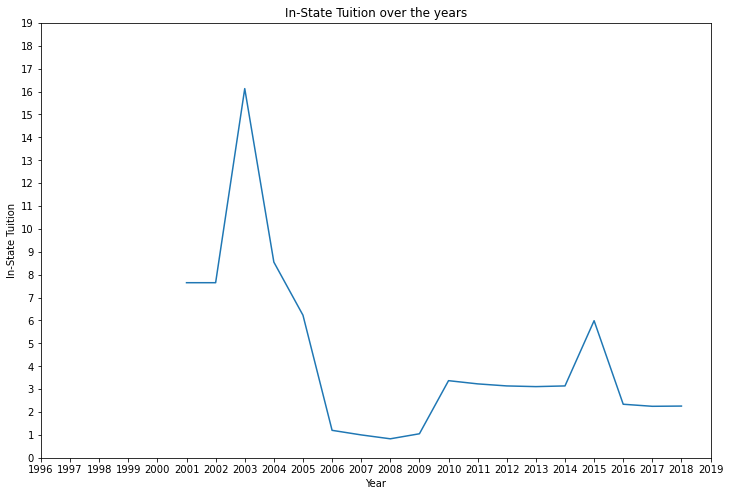

In [392]:
# Finaly, we can make the plot tuition growth rate year over year - bar first, then line chart

# (write code here)
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(UMBC_df1["YEAR"],UMBC_df1["PCT_CHANGE"])
ax.set_xticks(range(1996, 2020, 1))
ax.set_yticks(range(0, 20, 1)) 
ax.set_title("In-State Tuition over the years")
ax.set_xlabel("Year")
ax.set_ylabel("In-State Tuition")

In [393]:
# <12>
# Since we want to do the same calculation for JHU. 
# Instead of doing it piecemeal as we did for UMBC
# Let's create a function which can be reused for any college.
# This function takes a list of tuitions and return a list of percentage changes year over year
# This function can be used later 

#(Write code here)


def percent_tuition(df):
    
    listL = df.tolist()

    list_per_Change = []
    for i in range(len(listL)-1,  -1 , -1):
        per_Change = (((listL[i]-listL[i-1])/listL[i-1])*100)
        f = "{:.2f}".format(per_Change)
        list_per_Change.append(f)
    list_per_Change.reverse()
    return list_per_Change
 

In [394]:
# <13>
# the dataframe contains many years of data of all U.S. colleges.
# let's just look at JHU
# filter/query the dataframe to retrieve only rows that belong to JHU
# save the JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

#(Write code here)

JHU_df = df_new[df_new['INSTNM'].str.contains("Johns Hopkins")]
JHU_df

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005


Text(0, 0.5, 'In-State Tuition')

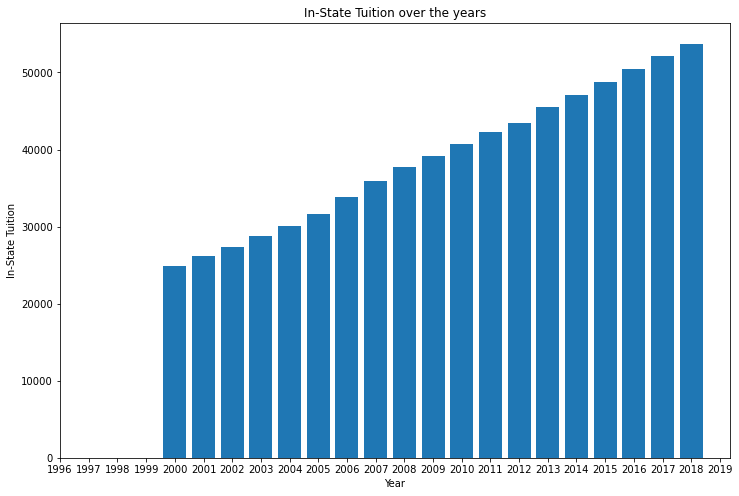

In [395]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

#(Write code here)
#bar chart
fig, ax = plt.subplots(figsize=(12,8))

ax.bar(JHU_df["YEAR"],JHU_df["TUITIONFEE_IN"])
ax.set_xticks(range(1996, 2020, 1)) 
ax.set_title("In-State Tuition over the years")
ax.set_xlabel("Year")
ax.set_ylabel("In-State Tuition")

Text(0, 0.5, 'In-State Tuition')

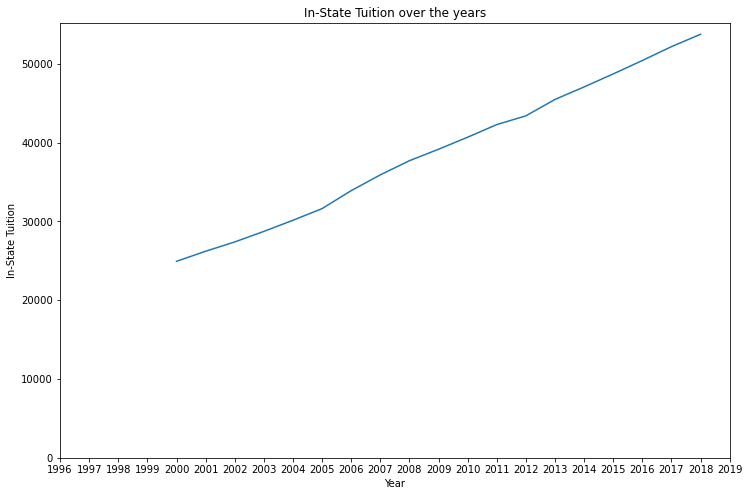

In [396]:
# <14> 
# Plot JHU's in-state tuition overtime from 1996 to 2019. 
# Let's plot bar and line chart together

#(Write code here)
#line chart
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(JHU_df["YEAR"],JHU_df["TUITIONFEE_IN"])
ax.set_xticks(range(1996, 2020, 1)) 
ax.set_yticks(range(0, 55000, 10000)) 
ax.set_title("In-State Tuition over the years")
ax.set_xlabel("Year")
ax.set_ylabel("In-State Tuition")

In [397]:
# <15>
# Let's calculate the JHU tuition percentge growth using the function defined earlier

#(Write code here)


JHU_percentage_change = percent_tuition(JHU_df["TUITIONFEE_IN"])
JHU_percentage_change

['nan',
 'nan',
 'nan',
 'nan',
 'nan',
 '5.13',
 '4.50',
 '4.89',
 '4.91',
 '4.91',
 '7.21',
 '5.90',
 '5.01',
 '3.85',
 '3.91',
 '3.93',
 '2.63',
 '4.79',
 '3.50',
 '3.51',
 '3.49',
 '3.49',
 '3.01']

In [398]:
# <16>
# Add the list of percentage changes to the dataframe as a new column ("PCT_CHANGE")

#(Write code here)
JHU_df1 = JHU_df.assign(PCT_CHANGE = JHU_percentage_change) 
JHU_df1['PCT_CHANGE'] = JHU_df1['PCT_CHANGE'].astype(float)
JHU_df1

,UNITID,INSTNM,STABBR,REGION,ADM_RATE,TUITIONFEE_IN,YEAR,PCT_CHANGE
2139,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1996,NaN
2039,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1997,NaN
1973,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1998,NaN
1946,162928,Johns Hopkins University,MD,2.0,NaN,NaN,1999,NaN
1917,162928,Johns Hopkins University,MD,2.0,NaN,24930.0,2000,NaN
1906,162928,Johns Hopkins University,MD,2.0,0.3431,26210.0,2001,5.13
1884,162928,Johns Hopkins University,MD,2.0,0.3506,27390.0,2002,4.50
1865,162928,Johns Hopkins University,MD,2.0,0.3060,28730.0,2003,4.89
1823,162928,Johns Hopkins University,MD,2.0,0.3071,30140.0,2004,4.91
1812,162928,Johns Hopkins University,MD,2.0,0.3509,31620.0,2005,4.91


Text(0, 0.5, 'In-State Tuition')

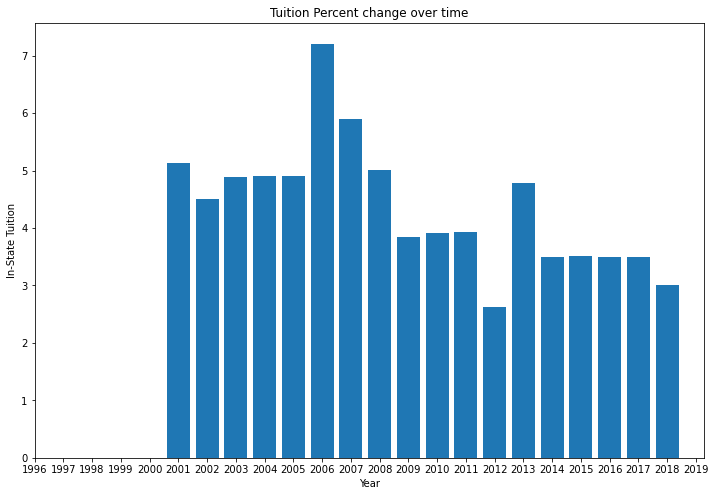

In [399]:
# <17> Make a bar plot of the JHU percentage changes tuitions over time

#(Write code here)

fig, ax = plt.subplots(figsize=(12,8))

ax.bar(JHU_df1["YEAR"],JHU_df1["PCT_CHANGE"])
ax.set_xticks(range(1996, 2020, 1)) 
ax.set_title("Tuition Percent change over time")
ax.set_xlabel("Year")
ax.set_ylabel("In-State Tuition")

In [400]:
# <18>
# In order to plot both UMBC and JHU tuition change over time in the same plot,
# we need to combine the two datasets using the common key of YEAR 
# First make a umbc2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "UMBC_PCT" in preparation for the merge.
# This is because both umbc and jhu dataframe have the same column name "PCT_CHANGE",
# We rename them to there is no collision during the merge. BTW, Pandas handles collision gracefully,
# Feel free to try it without changing the column names.

#(Write code here)
UMBC_df_2 = UMBC_df1[['YEAR', 'PCT_CHANGE']]
UMBC_df_2 = UMBC_df_2.rename(columns={'PCT_CHANGE': 'UMBC_PCT'})
UMBC_df_2

,YEAR,UMBC_PCT
2151,1996,NaN
2049,1997,NaN
1982,1998,NaN
1955,1999,NaN
1926,2000,NaN
1915,2001,7.65
1893,2002,7.65
1873,2003,16.13
1830,2004,8.55
1819,2005,6.23


In [401]:
# Then make a jhu2 dataframe with only two columns needed. WE don't need other columns.
# Also change the column name from "PCT_CHANGE" to "JHU_PCT"  in preparation for the merge

#(Write code here)
JHU_df_2 = JHU_df1[['YEAR', 'PCT_CHANGE']]
JHU_df_2 = JHU_df_2.rename(columns={'PCT_CHANGE': 'JHU_PCT'})
JHU_df_2

,YEAR,JHU_PCT
2139,1996,NaN
2039,1997,NaN
1973,1998,NaN
1946,1999,NaN
1917,2000,NaN
1906,2001,5.13
1884,2002,4.50
1865,2003,4.89
1823,2004,4.91
1812,2005,4.91


In [402]:
# Now, merger the two data frames
# and display the new dataframe

#(Write code here)
merged_df = UMBC_df_2.merge(JHU_df_2, on = ['YEAR'])
merged_df

,YEAR,UMBC_PCT,JHU_PCT
0,1996,NaN,NaN
1,1997,NaN,NaN
2,1998,NaN,NaN
3,1999,NaN,NaN
4,2000,NaN,NaN
5,2001,7.65,5.13
6,2002,7.65,4.50
7,2003,16.13,4.89
8,2004,8.55,4.91
9,2005,6.23,4.91


<ipython-input-403-a8c23e66854e>:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


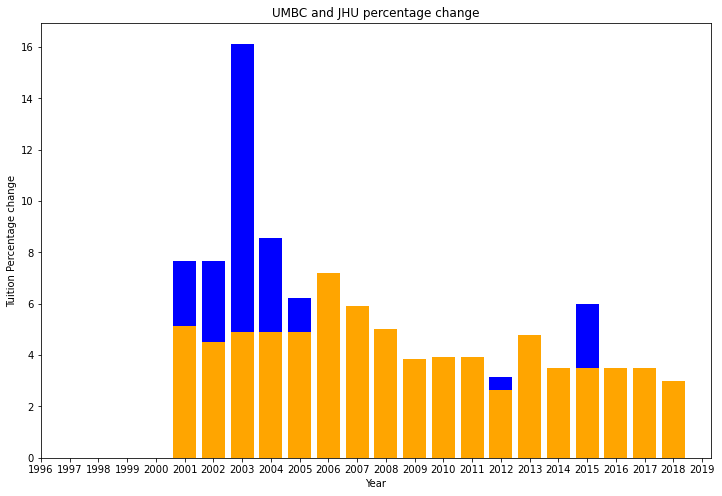

In [403]:
# Plot UMBC and JHU separately on the same plot 
# However, this does not work since the bars overlap.

#(Write code here)
fig, ax = plt.subplots(figsize=(12,8))


ax.bar(merged_df["YEAR"],merged_df["UMBC_PCT"], color = 'blue')
ax.bar(merged_df["YEAR"],merged_df["JHU_PCT"], color = 'orange')
ax.set_xticks(range(1996, 2020, 1)) 
ax.set_title("UMBC and JHU percentage change")
ax.set_xlabel("Year")
ax.set_ylabel("Tuition Percentage change")

fig.show()

<ipython-input-404-d427273a3b76>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


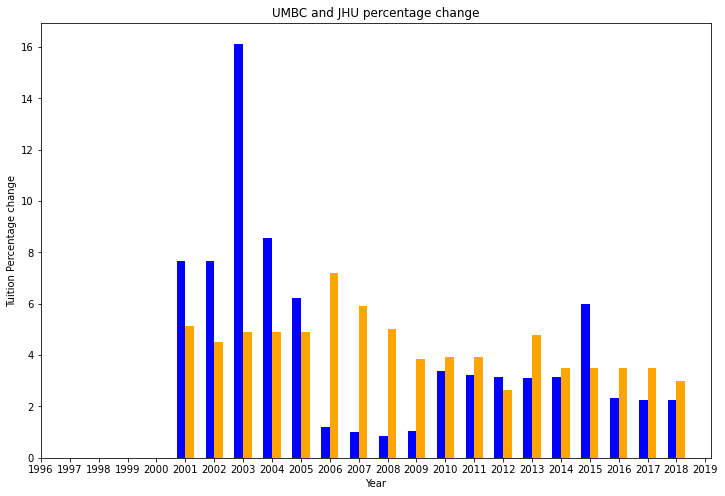

In [404]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of bar plot

#(Write code here)
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.30
ax.bar(merged_df["YEAR"] - bar_width/2, merged_df["UMBC_PCT"], bar_width, color = 'blue')
ax.bar(merged_df["YEAR"] + bar_width/2, merged_df["JHU_PCT"], bar_width, color = 'orange')
ax.set_xticks(range(1996, 2020, 1)) 
ax.set_title("UMBC and JHU percentage change")
ax.set_xlabel("Year")
ax.set_ylabel("Tuition Percentage change")

fig.show()


<ipython-input-405-87184a07797e>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


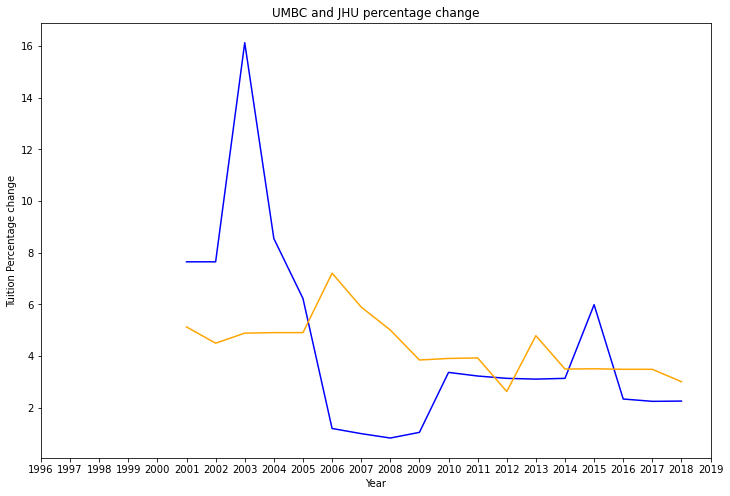

In [405]:
# Plot them together using y=["UMBC_PCT","JHU_PCT"] option of line plot

#(Write code here)
fig, ax = plt.subplots(figsize=(12,8))

#bar_width = 0.50
ax.plot(merged_df["YEAR"], merged_df["UMBC_PCT"], color = 'blue')
ax.plot(merged_df["YEAR"], merged_df["JHU_PCT"], color = 'orange')
ax.set_xticks(range(1996, 2020, 1)) 
ax.set_title("UMBC and JHU percentage change")
ax.set_xlabel("Year")
ax.set_ylabel("Tuition Percentage change")

fig.show()


In [406]:
# <19> 
# document your observation/conclusion of the comparison plots (bar/line)
# use the following Markdown cell

#### Based on my observation of the plots, I notice that from 2001 to 2005, the percentage change for UMBC tuition percent changes were higher than Johns Hopkins and then the trend got reversed from 2005 to 2011. Following that, in 2012 UMBC tuitions percent changes were once again higher and it was lower than Johns Hokins during 2013 and 2014. However, in 2015 UMBC tuition percent changes once again sored higher than JHU and and then from 2016 to 2019 the percent changes of tuitions were relatively lower than JHU's. We can also see that 2003 was the year when the UMBC percentage changes sored high once again and it fell signifcantly from 2006 to 2009. In terms of JHU the changes were relatively closer to the changes from the previous year in comparison to UMBC.

In [407]:
# The end.